In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import gc
import sys
import warnings
warnings.filterwarnings("ignore")

# Note: The dataset is too large in terms of features we will be using the dataset in form of chunks in the entire solution

In [9]:
#date = pd.read_csv('../input/bosch-production-line-performance/train_date.csv.zip', nrows=10000)
#numeric = pd.read_csv('../input/bosch-production-line-performance/train_numeric.csv.zip', nrows=10000)
#category = pd.read_csv('../input/bosch-production-line-performance/train_categorical.csv.zip', nrows=10000)
#Load data:
with open("../data_root.txt") as f:
    data_root_dir = f.read()
data_root_dir
train_numeric = pd.read_csv('%s/bosch/train_numeric.csv' % data_root_dir, nrows=10000)
test_numeric = pd.read_csv('%s/bosch/test_numeric.csv' % data_root_dir, nrows=10000)
train_date = pd.read_csv('%s/bosch/train_date.csv' % data_root_dir, nrows=10000)
test_date = pd.read_csv('%s/bosch/test_date.csv' % data_root_dir, nrows=10000)
train_category = pd.read_csv('%s/bosch/train_categorical.csv' % data_root_dir, nrows=10000)
test_category = pd.read_csv('%s/bosch/test_categorical.csv' % data_root_dir, nrows=10000)
#sub = pd.read_csv('../input/nlp-getting-started/sample_submission.csv')

In [13]:
train_date

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,...,L3_S50_D4246,L3_S50_D4248,L3_S50_D4250,L3_S50_D4252,L3_S50_D4254,L3_S51_D4255,L3_S51_D4257,L3_S51_D4259,L3_S51_D4261,L3_S51_D4263
0,4,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,82.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,1618.70,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,1149.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,602.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,904.17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,640.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
train_numeric

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9996,19915,-0.147,-0.168,-0.033,-0.016,0.074,0.161,0.030,0.128,0.056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9997,19917,-0.095,0.004,0.330,0.312,-0.143,-0.339,0.037,0.128,0.061,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [15]:
train_category

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,19915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,19917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,19921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# FEATURE ENGINEERING

### The list of numeric features is selected based on the other XGBOOST classifier check the numericclassifier notebook

In [16]:
num_feats = ['Id',
       'L3_S30_F3514', 'L0_S9_F200', 'L3_S29_F3430', 'L0_S11_F314',
       'L0_S0_F18', 'L3_S35_F3896', 'L0_S12_F350', 'L3_S36_F3918',
       'L0_S0_F20', 'L3_S30_F3684', 'L1_S24_F1632', 'L0_S2_F48',
       'L3_S29_F3345', 'L0_S18_F449', 'L0_S21_F497', 'L3_S29_F3433',
       'L3_S30_F3764', 'L0_S1_F24', 'L3_S30_F3554', 'L0_S11_F322',
       'L3_S30_F3564', 'L3_S29_F3327', 'L0_S2_F36', 'L0_S9_F180',
       'L3_S33_F3855', 'L0_S0_F4', 'L0_S21_F477', 'L0_S5_F114',
       'L0_S6_F122', 'L1_S24_F1122', 'L0_S9_F165', 'L0_S18_F439',
       'L1_S24_F1490', 'L0_S6_F132', 'L3_S29_F3379', 'L3_S29_F3336',
       'L0_S3_F80', 'L3_S30_F3749', 'L1_S24_F1763', 'L0_S10_F219',
 'Response']

In [18]:
length = train_date.drop('Id', axis=1).count()
date_cols = length.reset_index().sort_values(by=0, ascending=False)
stations = sorted(date_cols['index'].str.split('_',expand=True)[1].unique().tolist())
date_cols['station'] = date_cols['index'].str.split('_',expand=True)[1]
date_cols = date_cols.drop_duplicates('station', keep='first')['index'].tolist()

In [19]:
data = None
with open("../data_root.txt") as f:
    data_root_dir = f.read()
data_root_dir
for chunk in pd.read_csv('%s/bosch/train_date.csv' % data_root_dir, usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):

    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])

In [12]:
for chunk in pd.read_csv('../input/bosch-production-line-performance/test_date.csv.zip',usecols=['Id'] + date_cols,chunksize=50000,low_memory=False):
    
    chunk.columns = ['Id'] + stations
    chunk['start_station'] = -1
    chunk['end_station'] = -1
    for s in stations:
        chunk[s] = 1 * (chunk[s] >= 0)
        id_not_null = chunk[chunk[s] == 1].Id
        chunk.loc[(chunk['start_station']== -1) & (chunk.Id.isin(id_not_null)),'start_station'] = int(s[1:])
        chunk.loc[chunk.Id.isin(id_not_null),'end_station'] = int(s[1:])   
    data = pd.concat([data, chunk])
del chunk
gc.collect()   

2743

In [20]:
data = data[['Id','start_station','end_station']]
usefuldatefeatures = ['Id']+date_cols

In [21]:
minmaxfeatures = None
for chunk in pd.read_csv('%s/bosch/train_date.csv' % data_root_dir,usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

59

In [22]:
for chunk in pd.read_csv('%s/bosch/train_date.csv' % data_root_dir,usecols=usefuldatefeatures,chunksize=50000,low_memory=False):
    features = chunk.columns.values.tolist()
    features.remove('Id')
    df_mindate_chunk = chunk[['Id']].copy()
    df_mindate_chunk['mindate'] = chunk[features].min(axis=1).values
    df_mindate_chunk['maxdate'] = chunk[features].max(axis=1).values
    df_mindate_chunk['min_time_station'] =  chunk[features].idxmin(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    df_mindate_chunk['max_time_station'] =  chunk[features].idxmax(axis = 1).apply(lambda s: int(s.split('_')[1][1:]) if s is not np.nan else -1)
    minmaxfeatures = pd.concat([minmaxfeatures, df_mindate_chunk])

del chunk
gc.collect()

0

In [23]:
minmaxfeatures.sort_values(by=['mindate', 'Id'], inplace=True)
minmaxfeatures['min_Id_rev'] = -minmaxfeatures.Id.diff().shift(-1)
minmaxfeatures['min_Id'] = minmaxfeatures.Id.diff()

In [24]:
cols = [['Id']+date_cols,num_feats]

In [25]:
traindata = None
testdata = None

In [26]:
trainfiles = ['train_date.csv','train_numeric.csv']
testfiles = ['test_date.csv','test_numeric.csv']

In [28]:
for i,j in enumerate(trainfiles):
    
    subset = None
    
    for chunk in pd.read_csv('%s/bosch/' % data_root_dir + j,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
    
    if traindata is None:
        traindata = subset.copy()
    else:
        traindata = pd.merge(traindata, subset.copy(), on="Id")
        
del subset,chunk
gc.collect()
del cols[1][-1]

In [29]:
for i, j in enumerate(testfiles):
    subset = None
    
    for chunk in pd.read_csv('%s/bosch/' % data_root_dir + j,usecols=cols[i],chunksize=100000,low_memory=False):
        subset = pd.concat([subset, chunk])
        
    if testdata is None:
        testdata = subset.copy()
    else:
        testdata = pd.merge(testdata, subset.copy(), on="Id")
    
del subset,chunk
gc.collect()

0

In [30]:
traindata = traindata.merge(minmaxfeatures, on='Id')
traindata = traindata.merge(data, on='Id')
testdata = testdata.merge(minmaxfeatures, on='Id')
testdata = testdata.merge(data, on='Id')

In [31]:
del minmaxfeatures,data
gc.collect()

0

In [32]:
traindata

,Id,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,...,L3_S36_F3918,Response,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
0,4,82.24,82.24,82.24,NaN,82.26,NaN,NaN,82.26,82.27,...,NaN,0,82.24,87.29,0,35,-0.0,-2314450.0,0,42
1,4,82.24,82.24,82.24,NaN,82.26,NaN,NaN,82.26,82.27,...,NaN,0,82.24,87.29,0,35,-224451.0,0.0,0,42
2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1313.12,1315.75,12,33,-0.0,-943242.0,2,42
3,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0,1313.12,1315.75,12,33,-67530.0,0.0,2,42
4,7,1618.70,1618.70,1618.70,NaN,NaN,1618.72,1618.72,NaN,1618.73,...,NaN,0,1618.70,1624.42,0,33,-0.0,-2313512.0,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367489,2367492,1482.18,1482.18,NaN,1482.19,NaN,1482.20,1482.21,NaN,1482.21,...,0.108,0,1482.18,1490.61,0,34,2350932.0,0.0,0,42
2367490,2367493,608.83,608.83,NaN,608.83,608.85,NaN,NaN,608.85,608.85,...,NaN,0,608.83,610.75,0,33,-0.0,8988.0,0,42
2367491,2367493,608.83,608.83,NaN,608.83,608.85,NaN,NaN,608.85,608.85,...,NaN,0,608.83,610.75,0,33,2357190.0,0.0,0,42
2367492,2367495,937.61,937.61,937.61,NaN,937.64,NaN,NaN,937.64,937.65,...,-0.092,0,937.61,942.33,0,37,-0.0,4111.0,0,42


In [34]:
testdata

,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,...,L3_S36_F3918,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,Id,start_station,end_station


In [35]:
traindata.fillna(value=0,inplace=True)
testdata.fillna(value=0,inplace=True)

In [36]:
def mcc(tp, tn, fp, fn):
    num = tp * tn - fp * fn
    den = (tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)
    if den == 0:
        return 0
    else:
        return num / np.sqrt(den)

In [37]:
def eval_mcc(y_true, y_prob):
    idx = np.argsort(y_prob)
    y_true_sort = y_true[idx]
    n = y_true.shape[0]
    nump = 1.0 * np.sum(y_true) 
    numn = n - nump 
    tp,fp = nump,numn
    tn,fn = 0.0,0.0
    best_mcc = 0.0
    best_id = -1
    mccs = np.zeros(n)
    for i in range(n):
        if y_true_sort[i] == 1:
            tp -= 1.0
            fn += 1.0
        else:
            fp -= 1.0
            tn += 1.0
        new_mcc = mcc(tp, tn, fp, fn)
        mccs[i] = new_mcc
        if new_mcc >= best_mcc:
            best_mcc = new_mcc
            best_id = i
    return best_mcc

In [38]:
def mcc_eval(y_prob, dtrain):
    y_true = dtrain.get_label()
    best_mcc = eval_mcc(y_true, y_prob)
    return 'MCC', best_mcc

In [39]:
np.set_printoptions(suppress=True)

In [40]:
import gc

In [41]:
total = traindata[traindata['Response']==0].sample(frac=1).head(400000)
total = pd.concat([total,traindata[traindata['Response']==1]]).sample(frac=1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X,y = total.drop(['Response','Id'],axis=1),total['Response']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [45]:
X_train

,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,...,L3_S35_F3896,L3_S36_F3918,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
953441,973.82,973.82,0.00,973.82,973.84,0.00,973.84,0.00,973.84,973.84,...,0.000,0.008,973.82,975.88,0,33,-163834.0,0.0,0,42
1896811,654.27,654.27,654.28,0.00,0.00,654.29,654.30,0.00,654.30,654.30,...,0.000,0.008,654.27,655.90,0,36,-81328.0,0.0,0,42
1669013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,-0.136,0.000,812.64,812.66,29,35,-28806.0,0.0,35,42
121786,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.156,0.000,772.88,787.86,24,35,-0.0,31724.0,30,42
1417407,1427.10,1427.11,0.00,1427.11,0.00,1427.13,1427.13,0.00,1427.13,0.00,...,0.000,0.000,1427.10,1427.99,0,49,-4131.0,0.0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2255088,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,-0.192,1172.04,1175.83,26,33,-0.0,144387.0,32,42
497376,568.86,568.86,568.86,0.00,0.00,568.88,0.00,568.88,568.88,0.00,...,-0.007,0.000,568.86,571.06,0,37,-0.0,8086.0,0,42
2312708,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.025,0.000,683.91,687.04,12,34,-0.0,14569.0,2,42
2279818,1413.06,1413.07,1413.07,0.00,1413.08,0.00,1413.09,0.00,1413.09,0.00,...,0.113,0.000,1413.06,1413.23,0,33,-0.0,55115.0,0,42


In [46]:
X_test

,L0_S0_D3,L0_S1_D30,L0_S2_D54,L0_S3_D70,L0_S4_D106,L0_S5_D115,L0_S6_D120,L0_S7_D143,L0_S8_D145,L0_S9_D192,...,L3_S35_F3896,L3_S36_F3918,mindate,maxdate,min_time_station,max_time_station,min_Id_rev,min_Id,start_station,end_station
318822,1643.39,1643.39,1643.39,0.0,1643.40,0.0,0.00,1643.41,1643.41,0.00,...,-0.194,0.000,1643.39,1646.19,0,34,-0.0,4949.0,0,42
1329634,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000,0.008,373.98,422.89,25,36,-0.0,219277.0,31,42
381582,1494.28,1494.28,1494.28,0.0,0.00,1494.3,1494.31,0.00,1494.31,1494.31,...,0.000,0.008,1494.28,1498.91,0,33,-0.0,16277.0,0,42
243746,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,-0.021,0.000,1175.75,1193.83,24,34,-0.0,14019.0,30,42
1007917,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,-0.046,0.000,624.16,626.79,12,33,-68249.0,0.0,2,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566892,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,-0.035,0.000,1602.00,1611.95,12,37,-0.0,7302.0,2,42
37610,565.59,565.59,565.63,0.0,566.09,0.0,0.00,566.15,566.15,566.15,...,0.075,0.000,565.59,567.97,0,33,-0.0,1813.0,0,42
1245711,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.000,0.008,174.73,181.56,12,36,-57422.0,0.0,2,42
1213911,190.30,190.30,190.30,0.0,190.32,0.0,0.00,190.32,190.32,190.32,...,0.000,0.008,190.30,190.84,0,33,-3066.0,0.0,0,42


# MODELLING

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
model = RandomForestClassifier(n_estimators=500,n_jobs=-1,verbose=1,random_state=11)
model.fit(X_train,y_train)
pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.0min finished
[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  40 tasks      | elapsed:    0.5s
[Parallel(n_jobs=80)]: Done 290 tasks      | elapsed:    1.6s
[Parallel(n_jobs=80)]: Done 500 out of 500 | elapsed:    2.4s finished


In [49]:
from sklearn.metrics import recall_score,precision_score,plot_precision_recall_curve,confusion_matrix,classification_report,matthews_corrcoef

In [50]:
print(classification_report(pred,y_test))
print(matthews_corrcoef(y_test,pred))
confusion_matrix(y_test,pred)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    123008
           1       0.22      0.82      0.35      1120

    accuracy                           0.97    124128
   macro avg       0.61      0.90      0.67    124128
weighted avg       0.99      0.97      0.98    124128

0.42044676442543755


array([[119803,    198],
       [  3205,    922]])

In [51]:
print(recall_score(y_test,pred))
precision_score(y_test,pred)

0.2234068330506421


0.8232142857142857

[Parallel(n_jobs=80)]: Using backend ThreadingBackend with 80 concurrent workers.
[Parallel(n_jobs=80)]: Done  40 tasks      | elapsed:    0.4s
[Parallel(n_jobs=80)]: Done 290 tasks      | elapsed:    1.6s
[Parallel(n_jobs=80)]: Done 500 out of 500 | elapsed:    2.3s finished


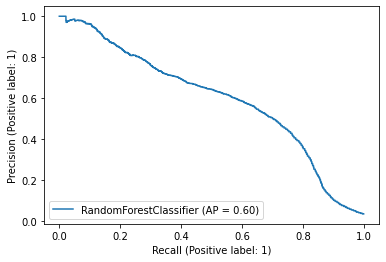

In [52]:
plot_precision_recall_curve(model,X_test,y_test)

In [53]:
test = model.predict(testdata.drop(['Id'],axis=1))

ValueError: Found array with 0 sample(s) (shape=(0, 100)) while a minimum of 1 is required.

In [ ]:
testdata['Response'] = test
testdata[['Id','Response']].to_csv("submit.csv",index=False)

In [49]:
!gzip submit.csv

In [48]:
!rm submit.csv.gz

In [ ]:
total